This is a exploratory analysis for Covid19 data obtained from the __European Centre for Disease Prevention and Control__

In [39]:
#import urllib.request
#url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
#filename = 'COVID-19-geographic-disbtribution-worldwide.xlsx'
#urllib.request.urlretrieve(url, filename)

#!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

Get Pandas and NumPy for feature engineering and calculations and get our plots inline.

In [40]:
import pandas as pd
import numpy  as np

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

import matplotlib.pyplot as plt

We read our dataframe `df` directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [41]:
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')


In [42]:
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020    746       6             Afghanistan    AF   
1 2020-12-13   13     12  2020    298       9             Afghanistan    AF   
2 2020-12-12   12     12  2020    113      11             Afghanistan    AF   
3 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
4 2020-12-10   10     12  2020    202      16             Afghanistan    AF   
5 2020-12-09    9     12  2020    135      13             Afghanistan    AF   
6 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
7 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
8 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
9 2020-12-05    5     12  2020    235      18             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2                                           6.868768           
3                                           7.134266           
4                                           6.968658           
5                                           6.963401           
6                                           7.094835           
7                                           7.215755           
8                                           7.326160           
9                                           7.115865

Use a `count` on columns to see how many missing values we have. We would like to analyze countries by `geoId`.

In [43]:
df.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61900
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

Select rows with missing `geoId`.

In [44]:
df[df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].isna()]

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
327   2020-01-12   12      1  2020      0       0             Afghanistan   
328   2020-01-11   11      1  2020      0       0             Afghanistan   
329   2020-01-10   10      1  2020      0       0             Afghanistan   
330   2020-01-09    9      1  2020      0       0             Afghanistan   
331   2020-01-08    8      1  2020      0       0             Afghanistan   
...          ...  ...    ...   ...    ...     ...                     ...   
61895 2020-03-25   25      3  2020      0       0                Zimbabwe   
61896 2020-03-24   24      3  2020      0       1                Zimbabwe   
61897 2020-03-23   23      3  2020      0       0                Zimbabwe   
61898 2020-03-22   22      3  2020      1       0                Zimbabwe   
61899 2020-03-21   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
327      AF                  AFG   38041757.0         Asia   
328      AF                  AFG   38041757.0         Asia   
329      AF                  AFG   38041757.0         Asia   
330      AF                  AFG   38041757.0         Asia   
331      AF                  AFG   38041757.0         Asia   
...     ...                  ...          ...          ...   
61895    ZW                  ZWE   14645473.0       Africa   
61896    ZW                  ZWE   14645473.0       Africa   
61897    ZW                  ZWE   14645473.0       Africa   
61898    ZW                  ZWE   14645473.0       Africa   
61899    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
327                                                  NaN           
328                                                  NaN           
329                                                  NaN           
330                                                  NaN           
331                                                  NaN           
...                                                  ...           
61895                                                NaN           
61896                                                NaN           
61897                                                NaN           
61898                                                NaN           
61899                                                NaN           

[2879 rows x 12 columns]

<AxesSubplot:ylabel='continentExp'>

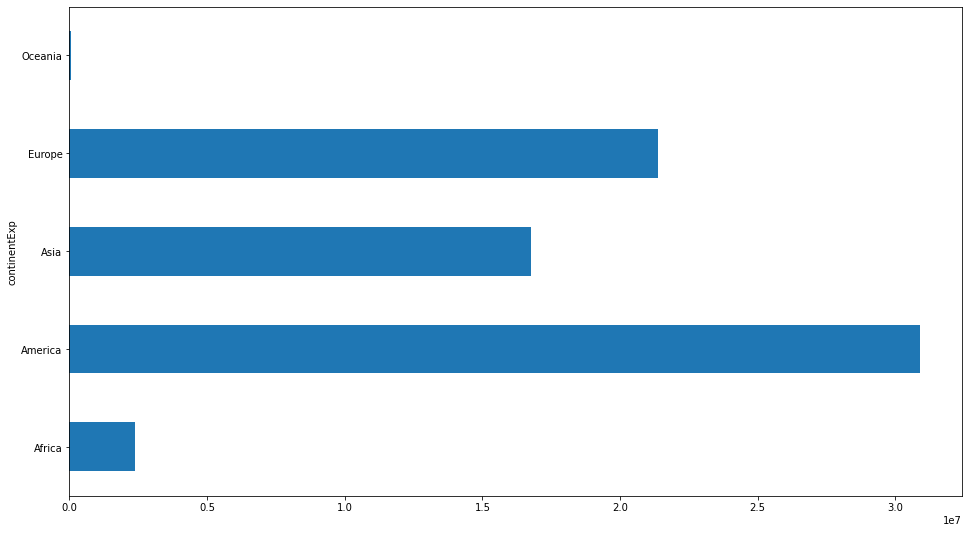

In [45]:
df.dropna().groupby('continentExp')['cases'].sum().plot.barh(x='geoId', y='cases', figsize=(16, 9))

<AxesSubplot:ylabel='geoId'>

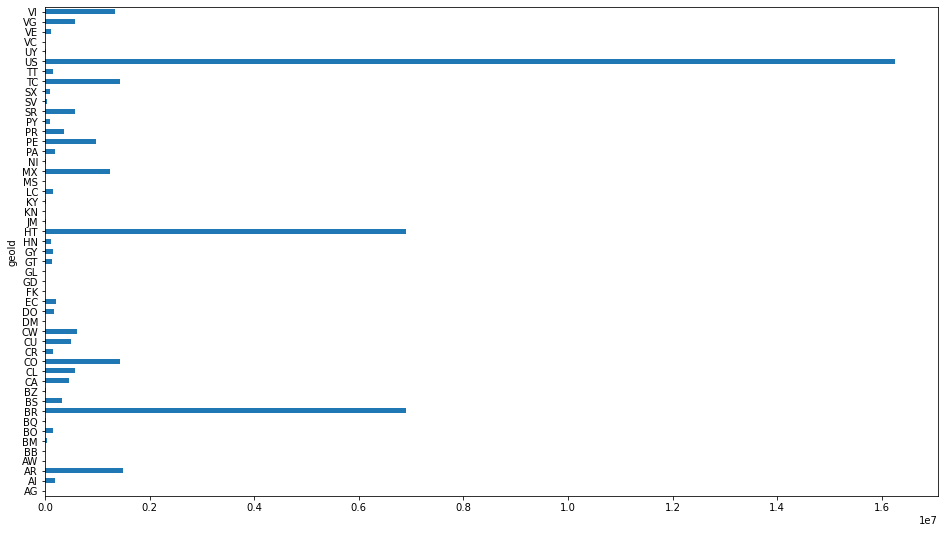

In [74]:
df.dropna().groupby('geoId')['cases'].sum().plot.barh(x='geoId', y='cases', figsize=(16, 9))

df[df['continentExp'] == 'America'].groupby('geoId')['cases'].sum().plot.barh(x='geoId', y='cases', figsize=(16, 9))

Because we seemed to miss some `geoId` entries, we would drop those lines using `dropna`. They were cases from Namibia, where the country code is __NA__, which we now read as data. The resulting dataframe is pivoted so we get one row per date in `dateRep`, columns by `geoId` and the number of new `cases` and `deaths` for that date and country in the cells. Again, show the first 10 rows from our new dataframe `df_geo` to check the result of our `pivot`.

In [47]:
df_geo = df.dropna(subset=['geoId']).pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
dateRep                                                   ...                   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-05   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-06   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-07   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-08   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-09   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
dateRep                                 
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
2020-01-05 NaN NaN NaN NaN NaN NaN NaN  
2020-01-06 NaN NaN NaN NaN NaN NaN NaN  
2020-01-07 NaN NaN NaN NaN NaN NaN NaN  
2020-01-08 NaN NaN NaN NaN NaN NaN NaN  
2020-01-09 NaN NaN NaN NaN NaN NaN NaN  

[10 rows x 428 columns]

Structure is looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to get an idea of what's there.

In [48]:
df_geo.describe().transpose()

count        mean         std   min    25%    50%     75%  \
       geoId                                                              
cases  AD     276.0   26.586957   49.550669   0.0   0.00    2.0   37.25   
       AE     344.0  537.642442  452.329433   0.0  81.75  451.0  885.75   
       AF     340.0  144.920588  206.561603   0.0   0.00   61.5  200.50   
       AG     270.0    0.548148    2.587412   0.0   0.00    0.0    0.00   
       AI     263.0    0.038023    0.244167   0.0   0.00    0.0    0.00   
...             ...         ...         ...   ...    ...    ...     ...   
deaths XK     276.0    4.340580    5.600645 -12.0   0.00    2.0    8.00   
       YE     249.0    2.433735    5.432562   0.0   0.00    1.0    3.00   
       ZA     282.0   82.539007   82.997022   0.0  13.25   63.5  118.75   
       ZM     271.0    1.354244    4.240018   0.0   0.00    0.0    1.00   
       ZW     269.0    1.141264    2.614991   0.0   0.00    0.0    1.00   

                 max  
       geoId          
cases  AD      299.0  
       AE     1578.0  
       AF     1063.0  
       AG       39.0  
       AI        2.0  
...              ...  
deaths XK       40.0  
       YE       52.0  
       ZA      572.0  
       ZM       40.0  
       ZW       18.0  

[428 rows x 8 columns]

In [49]:
#Where is Greece?

df[df['countriesAndTerritories'] == 'Scotland']

Empty DataFrame
Columns: [dateRep, day, month, year, cases, deaths, countriesAndTerritories, geoId, countryterritoryCode, popData2019, continentExp, Cumulative_number_for_14_days_of_COVID-19_cases_per_100000]
Index: []

Get to know your data by visualization, in this case the number of new `cases` per day for my home country __CL__.



Text(0, 0.5, 'Number of cases')

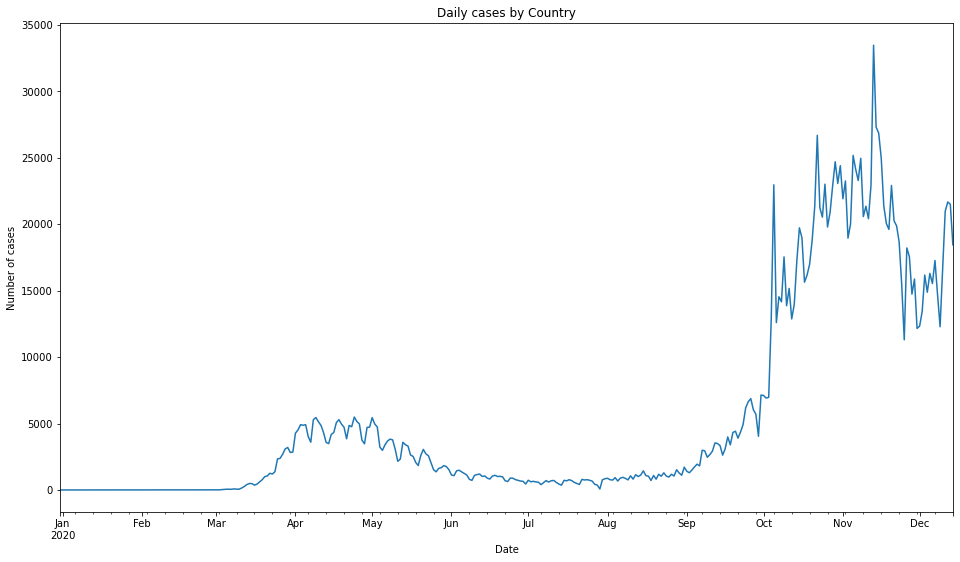

In [75]:
countries = ['CL', 'UK',  'ES', 'CN', 'DE', 'EL', 'CY', 'NZ']

df_geo['cases']['UK'].plot(figsize=(16, 9))
plt.title("Daily cases by Country")
plt.xlabel("Date")
plt.ylabel("Number of cases")

Note that you could also use `df_geo.cases.NL.plot()` here, but I prefer the more explicit notation, especially in more complex statements.

Because of the pivoted data format it is just as easy to look at the number of `deaths`.

<AxesSubplot:xlabel='dateRep'>

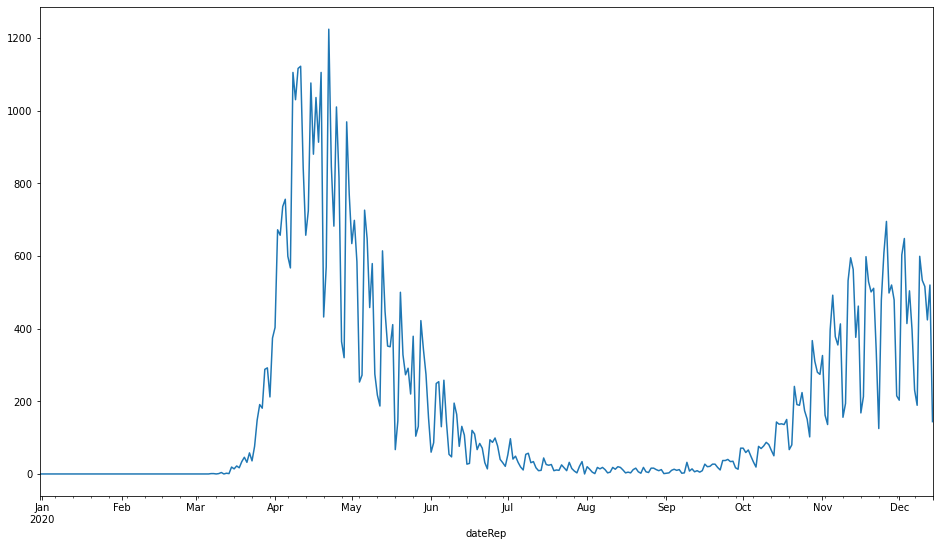

In [51]:
df_geo['deaths']['UK'].plot(figsize=(16, 9))

If you want both, you have to generate different slices of our pivot table (or make a new pivot), so the call is a bit different.

<AxesSubplot:xlabel='dateRep'>

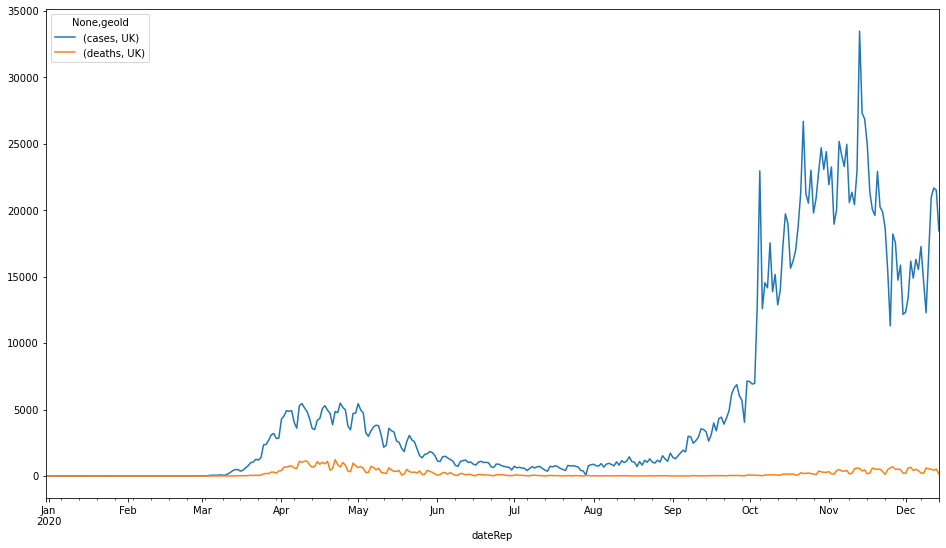

In [52]:
df_geo[[('cases', 'UK'), ('deaths', 'UK')]].plot(figsize=(16, 9))

What would Chile look like?

<AxesSubplot:xlabel='dateRep'>

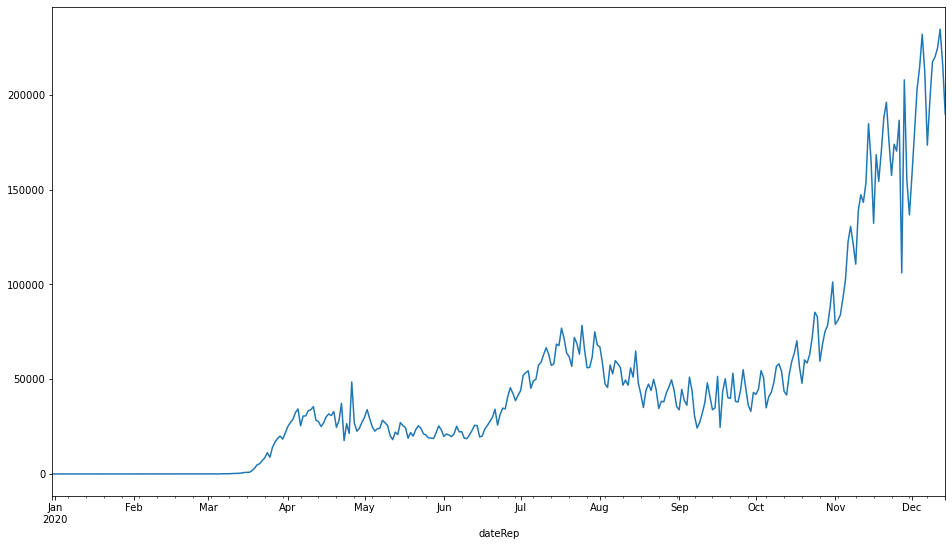

In [79]:
df_geo['cases']['US'].plot(figsize=(16, 9))

The big spike in the middle was a change in counting, where they decided to count an extra __31000 cases__. When was that? We select lines for `cases` in __CL__ above 5000 and show the actual number.


In [78]:
df_geo[df_geo['cases']['UK'] > 30000]['cases']['UK']

dateRep
2020-11-13    33470.0
Name: UK, dtype: float64

So what does the original record look like? We select the full record for `geoId` __CL__ and the correct date.

In [55]:
df[(df['geoId'] == 'CL') & (df['dateRep'] == '20200618')]['cases']

11992    36179
Name: cases, dtype: int64

After these selection examples we'll try some more advanced exploration. To see the growth in number of cases, we use a cumulative sum with `cumsum`, in this case we show __CL__, __UK__ and __US__.

<AxesSubplot:xlabel='dateRep'>

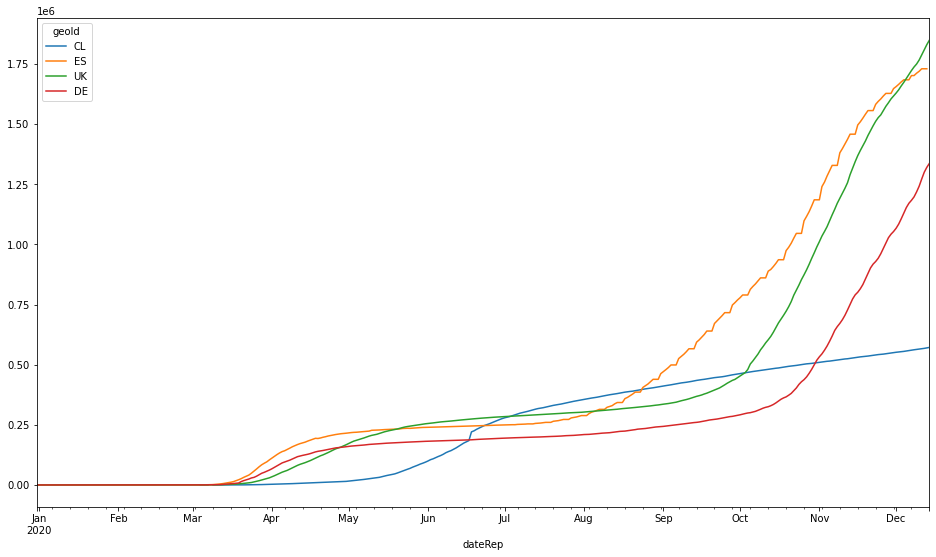

In [56]:
df_geo['cases'][['CL','ES', 'UK', 'DE']].cumsum().plot(figsize=(16, 9))

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy. This will generate some warnings because `cases` can be zero.

<ipython-input-57-68027ddae762>:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(df_geo['cases'][['CL', 'UK', 'US']].cumsum()).plot(figsize=(16, 9), grid=True)


<AxesSubplot:xlabel='dateRep'>

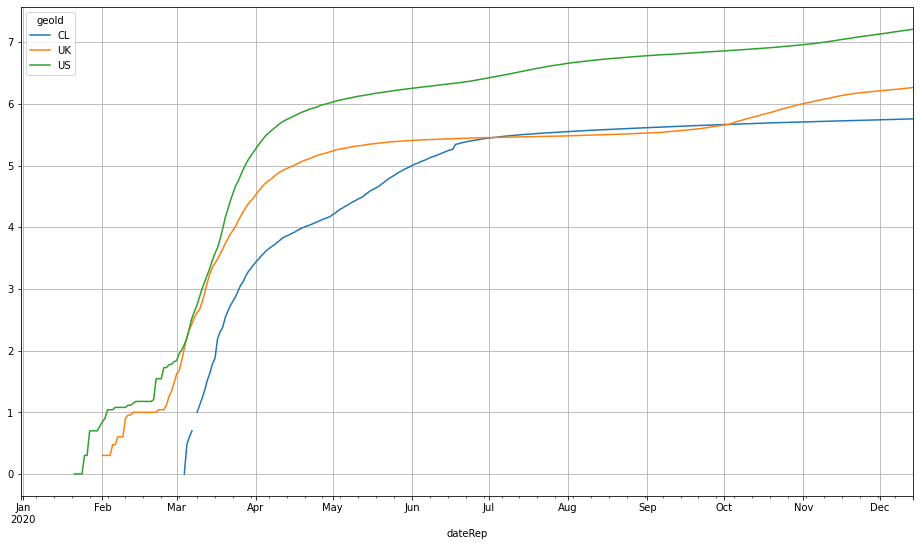

In [57]:
np.log10(df_geo['cases'][['CL', 'UK', 'US']].cumsum()).plot(figsize=(16, 9), grid=True)

Alternatively, we ask `plot` to use a logarithmic scale.

<AxesSubplot:xlabel='dateRep'>

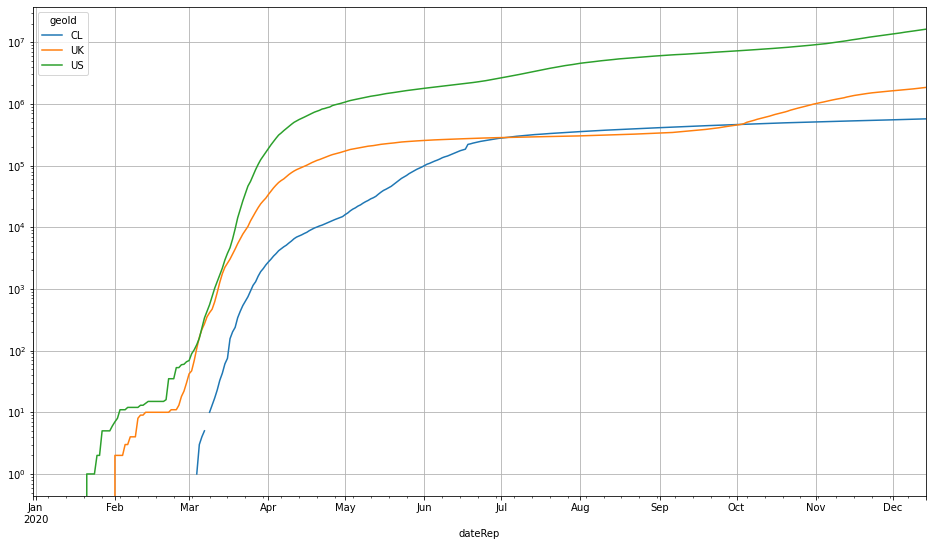

In [58]:
df_geo['cases'][['CL', 'UK', 'US']].cumsum().plot(logy=True, figsize=(16, 9), grid=True)

This clearly shows the phases in __UK__ and __US__, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For __CL__ we see measures take effect. Also, no real startup curve here.

Perhaps some other countries also show this effect, have a look at your own country!

<AxesSubplot:xlabel='dateRep'>

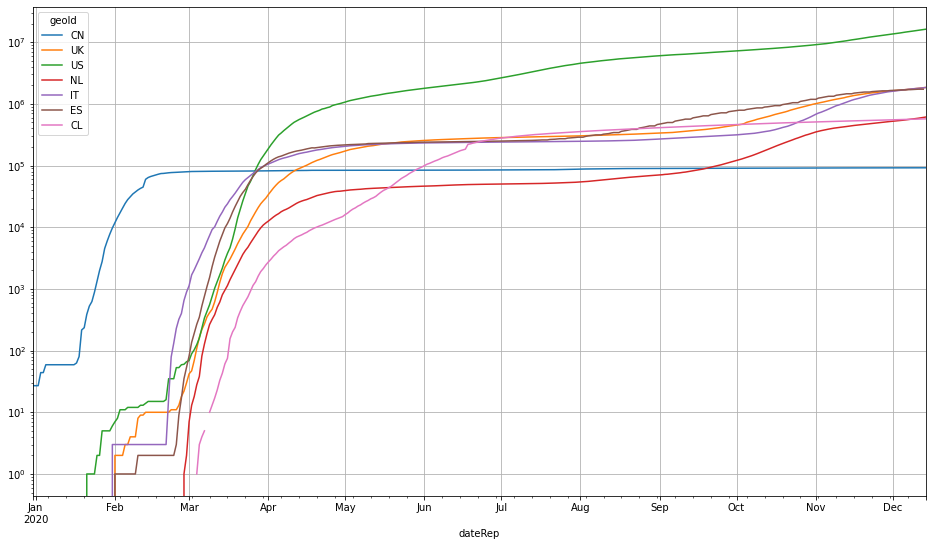

In [59]:
df_geo['cases'][['CN', 'UK', 'US', 'NL', 'IT', 'ES', 'CL']].cumsum().plot(logy=True, figsize=(16, 9), grid=True)

Another often used measure is relative growth in total number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the `loc` method which allows us to select from the dataframe index.

<AxesSubplot:xlabel='dateRep'>

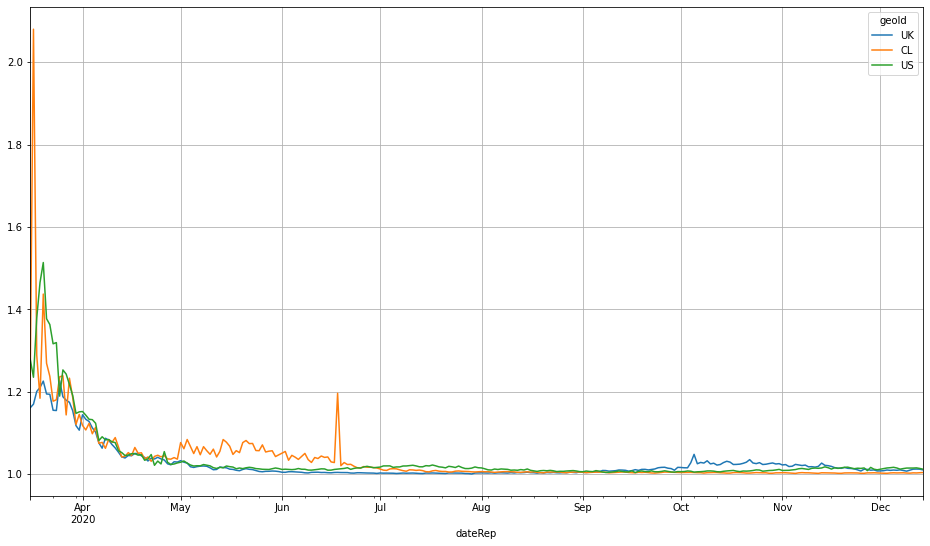

In [60]:
(df_geo.cumsum() / df_geo.shift(1).cumsum(
    ))['cases'][['UK', 'CL', 'US']].loc['20200316':].plot(figsize=(16, 9), grid=True)

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double the total amount of cases by some logarithmic magic. For __NL__ the number doubled every one or two days in the beginning but now it doubles in way over 14 days, which is a good sign (more about these 14 days later on). If this number keeps rising we will never get to the point where it doubles again.



<AxesSubplot:xlabel='dateRep'>

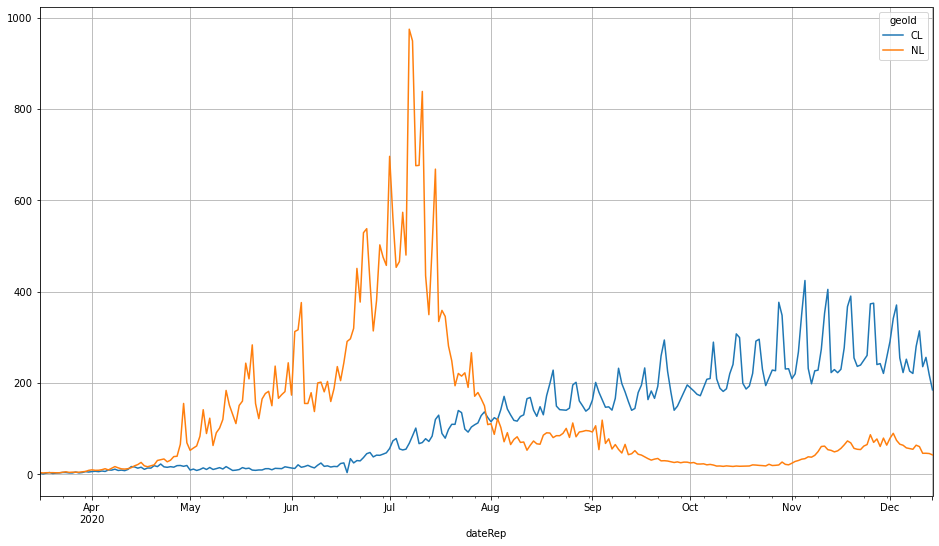

In [61]:
# $$\frac{\log_{10} 2}{\frac{\log_{10} \sum \limits _{i=0} ^{n-1}cases_{j-i}}{ cumulative sum}}$$

(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum(
    )))['cases'][['CL', 'NL']].loc['20200316':].plot(figsize=(16, 9), grid=True)

Rolling window functions can be used to smooth a curve, in this case the `rolling` 7 day `mean` new cases for __CL__, __UK__ and __US__.

$$\frac{1}{n} \sum \limits _{i=0} ^{n-1} cases_{j-i} $$

<AxesSubplot:xlabel='dateRep'>

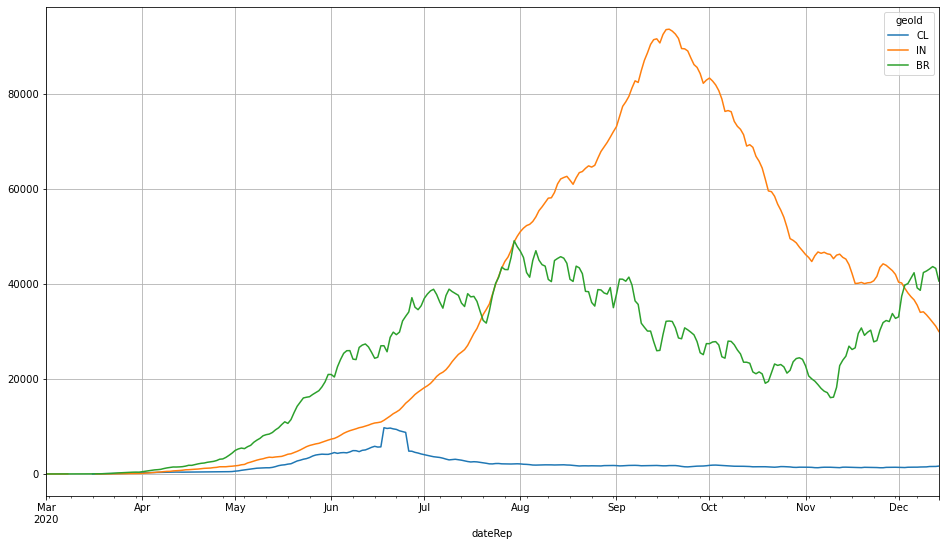

In [62]:
df_geo['cases'][['CL', 'IN', 'BR']].rolling(8).mean().loc['20200301':].plot(figsize=(16, 9), grid=True)

The default window function is a rectangle (called `boxcar`), where all values are weighed equally. Using another window function will weigh the values in the window differently, such as a triangle function which will focus more on the recent values in the window.

<AxesSubplot:xlabel='dateRep'>

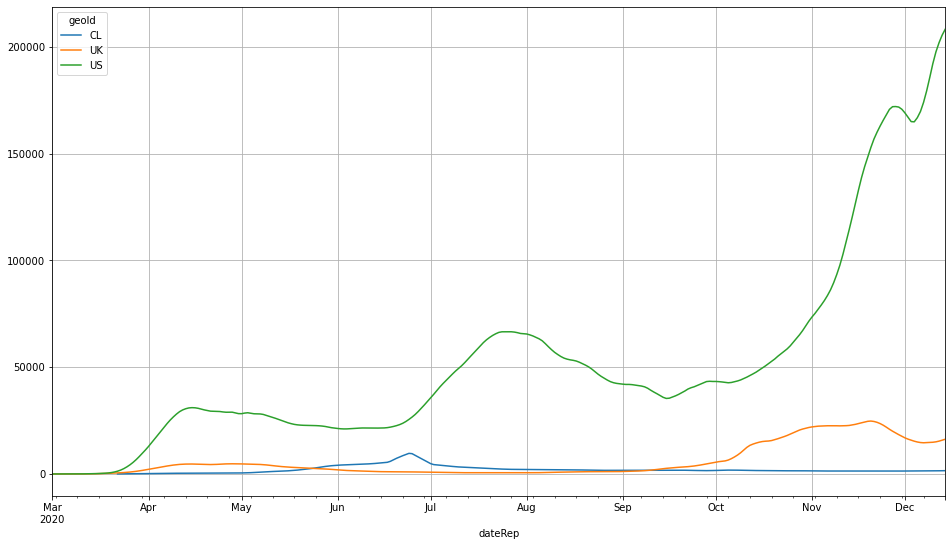

In [63]:
df_geo['cases'][['CL', 'UK', 'US']].rolling(14, win_type='triang').mean().loc['20200301':].plot(figsize=(16, 9), grid=True)

If we use such a window on the __CN__ data you can see that the spike for 15000 cases gets more evenly distributed.

<AxesSubplot:xlabel='dateRep'>

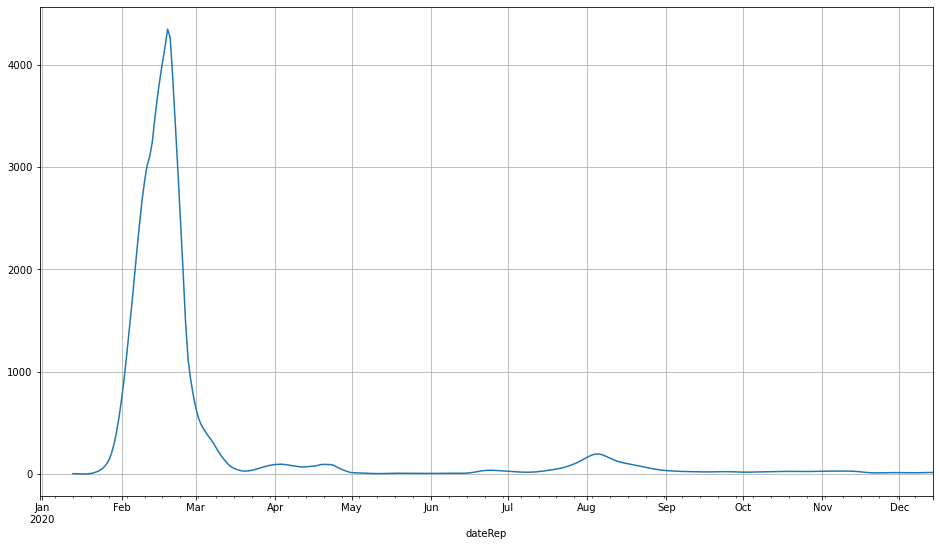

In [64]:
df_geo['cases']['CN'].rolling(14, win_type='triang').mean().plot(figsize=(16, 9), grid=True)

Now let's have a look at _the curve_ which we are supposed to flatten, to prevent overload on our healthcare system. It shows the number of active cases (the _infected_ category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC but other studies suggest 18 days), so we only look at new cases from the last 14 days. By leaving out older infections (the _removed_ category in SIR) this shows us the current number of active infections.

<AxesSubplot:xlabel='dateRep'>

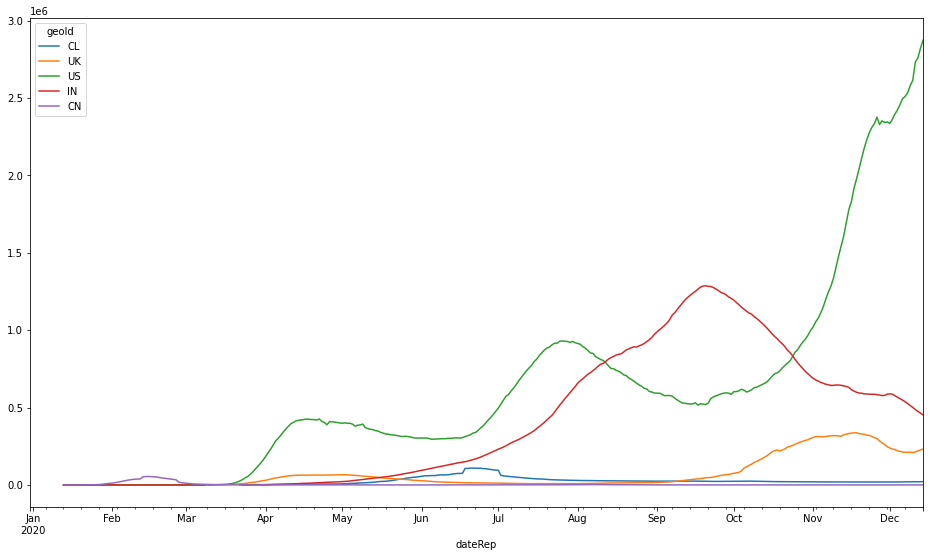

In [65]:
df_geo['cases'][['CL', 'UK', 'US', 'IN', 'CN']].rolling(14).sum().plot(figsize=(16, 9))

Assuming that we see about 8% of currently infected in Intensive Care, we can monitor the necessary capacity with the following graph.

<AxesSubplot:xlabel='dateRep'>

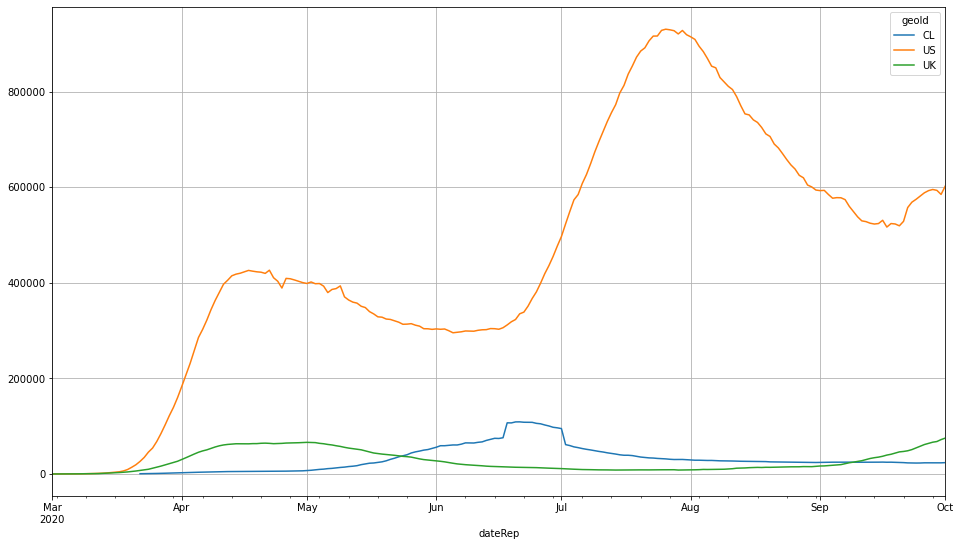

In [66]:
(df_geo['cases'][['CL', 'US', 'UK']].rolling(14).sum().loc['20200301':'20201001'] * 1).plot(figsize=(16, 9), grid=True)

For __NL__ this more or less corresponds with the official ICU data. The actual drop in patients is probably offset by an increase in testing, so we may have to gradually lower the percentage.

In [67]:
(df_geo['cases'][['CL', 'UK', 'US']].rolling(14).sum() * 0.04).tail(14)

geoId           CL       UK         US
dateRep                               
2020-12-01  765.56  9559.04   93429.52
2020-12-02  770.16  9294.16   94473.72
2020-12-03  773.60  9156.60   95805.96
2020-12-04  775.76  8835.12   96875.04
2020-12-05  782.00  8676.96   98307.56
2020-12-06  781.00  8503.52   99765.12
2020-12-07  789.68  8447.88  100403.56
2020-12-08  802.48  8418.60  101338.40
2020-12-09  817.88  8457.88  103220.44
2020-12-10  827.44  8392.48  104557.88
2020-12-11  831.12  8528.84  109301.44
2020-12-12  830.04  8806.16  110370.24
2020-12-13  833.60  9031.36  112815.20
2020-12-14  859.56  9283.04  114937.32

The structure of our dataframe lends itself to exploring all kinds of other measures. What about infection rate? The example below gives the average number of cases for last week divided by the infectious cases a week before, a proxy for the infamous `R` measure. Again we use rolling window for smoothing and add a couple of example options for `plot`.

<AxesSubplot:xlabel='dateRep'>

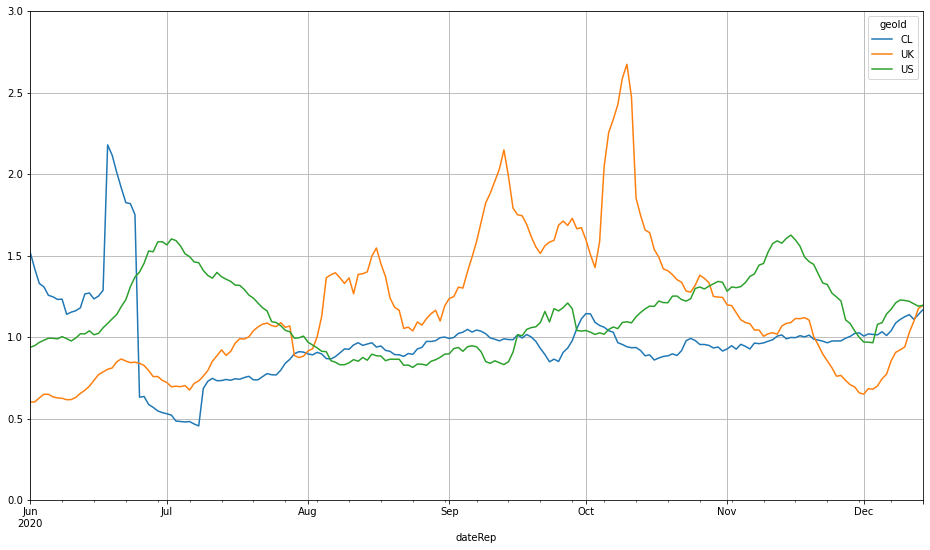

In [68]:
#countries = ['US', 'UK', 'RU', 'JP', 'IT', 'SE', 'DE', 'AT', 'BE', 'NL', 'BR']
countries = ['CL', 'UK', 'US']

(df_geo.rolling(7).mean() / df_geo.shift(7).rolling(14).mean(
    ))['cases'][countries].loc['20200601':].plot(
    figsize=(16, 9), grid=True, ylim=(0, 3))

Or what about the number of deaths in the week before as part of the number of active cases in the week before that? In other words, an estimate of the death rate *for known cases*, heavily depending on the testing and recording policies so in no way comparable across countries or even within a country over time.

<AxesSubplot:xlabel='dateRep'>

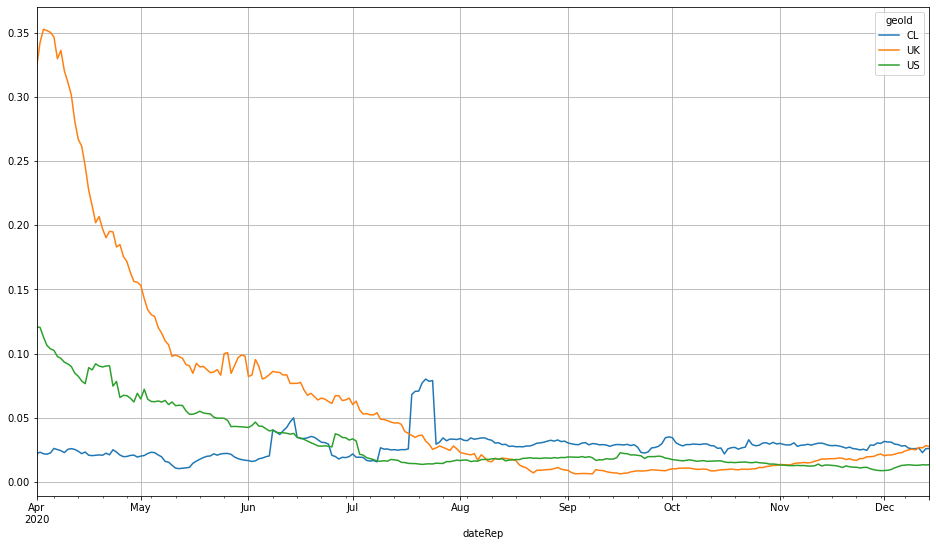

In [69]:
(df_geo.rolling(7).mean()['deaths'] / df_geo.shift(7).rolling(14).mean(
    )['cases'])[countries].loc['20200401':].plot(
    figsize=(16, 9), grid=True)

Instead of plotting you can also use aggregate functions at the end, such as `mean`. Again, a lot of information about the underlying assumptions and policies would be needed to interpret these numbers correctly. The numbers below are actually more a measure of test intensity, e.g. if you only test people with heavy symptoms the fatality rate will be high.

In [70]:
(df_geo.rolling(7).mean()['deaths'] / df_geo.shift(7).rolling(14).mean(
    )['cases'])[countries].loc['20200501':].mean()

geoId
CL    0.028557
UK    0.037581
US    0.024062
dtype: float64

Based on a recent paper by Daddi and Giavalisco, the double log of the cumulative cases divided by the daily increase should approach linearity. Ignoring the noise of spurious cases in the beginning, at least the middle part of the outbreak looks promising.

<ipython-input-71-64edd513ca58>:1: RuntimeWarning: invalid value encountered in log
  np.log(np.log(df_geo.cumsum() / df_geo))['cases'][countries].loc['20200301':].rolling(7).mean().plot(
<ipython-input-71-64edd513ca58>:1: RuntimeWarning: divide by zero encountered in log
  np.log(np.log(df_geo.cumsum() / df_geo))['cases'][countries].loc['20200301':].rolling(7).mean().plot(


<AxesSubplot:xlabel='dateRep'>

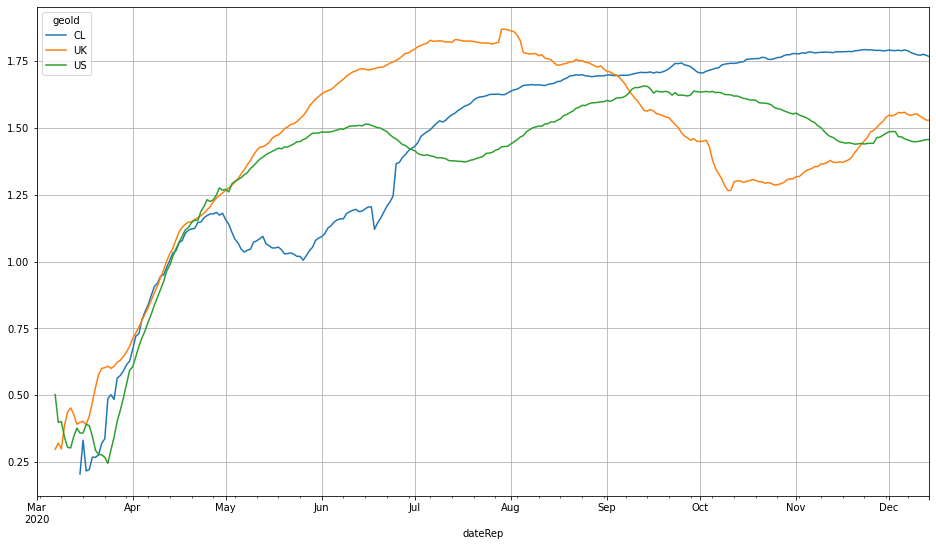

In [71]:
np.log(np.log(df_geo.cumsum() / df_geo))['cases'][countries].loc['20200301':].rolling(7).mean().plot(
    figsize=(16, 9), grid=True)

<AxesSubplot:xlabel='dateRep'>

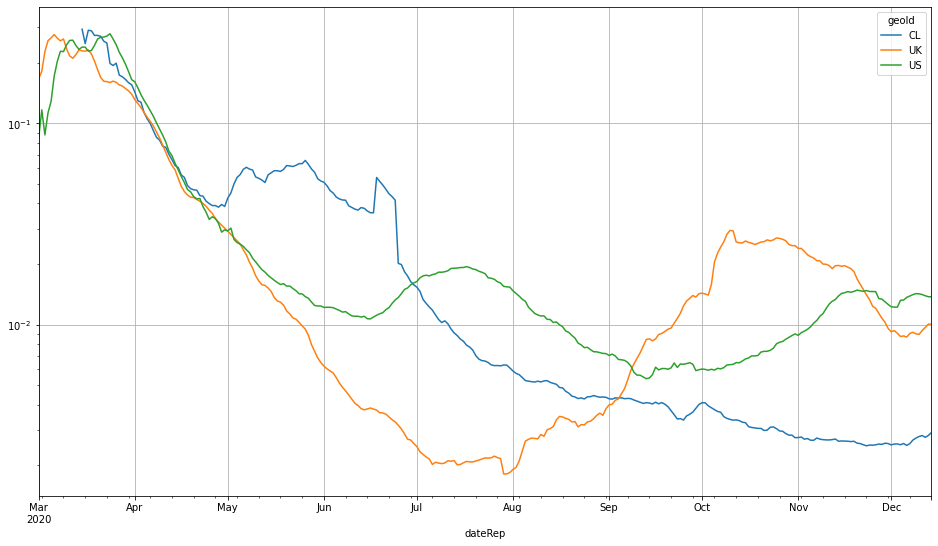

In [72]:
#countries = ['NL', 'UK', 'CH', 'IT', 'BR', 'US']

(df_geo / df_geo.cumsum())['cases'][countries].rolling(7).mean().loc['20200301':].plot(
    figsize=(16, 9), grid=True, logy=True)

If you want a more detailed interactive overview of your dataframe, pandas profiling is very useful.

In [73]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Keep exploring! Stay home, wash your hands, keep your distance.